# <center> Prediccion de Precios en Bienes Raices - Mercado Australiano - Regresion Avanzada

# Tabla de Contenido

1. [Introduccion](#Introduccion)
2. [Configuracion e Instalacion](#Configuracion-e-Instalacion)
3. [Entendimiento de los Datos](#Entendimiento-de-los-Datos)  
4. [Manipulacion y Limpieza de Datos](#Manipulacion-y-Limpieza-de-Datos)
    1. [Dropping Data](#Dropping-Data)
    2. [Derived Data](#Derived-Data)
5. [Analisis de Datos](#Analisis-de-Datos)
    1. [Analisis-Univariable](#Analisis-Univariable)
        1. [Plot Numeric Data](#Plot-Numeric-Data)
        2. [Plot Categorical Data](#Plot-Categorical-Data)
    2. [Analisis-Bivariable](#Analisis-Bivariable)
6. [Preparacion de Datos y Modelado](#Preparacion-de-Datos-y-Modelado)
    1. [Splitting data into Train Test](#Splitting-data-into-Train-Test)
7. [Construccion-del-Modelo](#Model-Building)
    1. [Ridge Regression](#Ridge-Regression)
    2. [Lasso Regression](#Lasso-Regression)
8. [Conclusiones y Observaciones](#Conclusiones-y-Observaciones)

# Introduccion 

### Integrates de Grupo:
* Alicia Zamorano zamoranoalicia@gmail.com
* César Quiroga cesar.a.quiroga.c@gmail.com
* Juan Carlos Peralta juancarlosperaltaolivera@gmail.com
* Nilton Apaza nilton.apcon@gmail.com

## Entendimiento del Negocio

Una empresa de vivienda con sede en EE. UU. llamada Surprise Housing ha decidido ingresar al mercado australiano. La empresa utiliza el análisis de datos para comprar casas a un precio inferior a sus valores reales y venderlas a un precio más alto. Con el mismo propósito, la empresa ha recopilado un conjunto de datos de la venta de casas en Australia. Los datos se proporcionan en el archivo CSV a continuación.

La compañía está buscando posibles propiedades para comprar e ingresar al mercado. Debe construir un modelo de regresión utilizando la regularización para predecir el valor real de las posibles propiedades y decidir si invertir en ellas o no.

La empresa quiere saber:

* Qué variables son significativas para predecir el precio de una casa, y
* Qué tan bien esas variables describen el precio de una casa.

Además, determine el valor óptimo de lambda para la regresión de Ridge y Lasso.
 
### Objetivo del Negocio:

Debe modelar el precio de las casas con las variables independientes disponibles. Luego, la gerencia utilizará este modelo para comprender cómo varían exactamente los precios con las variables. En consecuencia, pueden manipular la estrategia de la empresa y concentrarse en áreas que generarán altos rendimientos. Además, el modelo será una buena manera para que la gerencia entienda la dinámica de precios de un nuevo mercado.

# Configuracion e Instalacion

In [ ]:
# Importar Librerias Requeridas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab 
import seaborn as sns
import sys

from scipy import stats

# Importar Librerias de Machine Learning
import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Importar Librerias de Estadistica
import statsmodels.api as stats
from statsmodels.api import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

# Importar las librerias para Lasso regession
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

import scipy.stats as stats

# Ignorar Alertas (Warnings)
import warnings
warnings.filterwarnings('ignore')

# Definir precision del FLOAT a dos digitos.
pd.options.display.float_format = '{:.2f}'.format 

In [ ]:
# Leer el DATASET CSV con en un Dataframe.

# Direccion relativa del Dataset
DATA_FILE_PATH = 'dataset.csv'

raw_data = pd.read_csv(DATA_FILE_PATH)

# Entendimiento de los Datos

---



El dataset se conforma de 81 columnas y 1460 registros acerca de las venta de bienes raíces en Australia, comprendida entre los años 2006 y 2010. Mediante el mismo se pretende realizar la ***Predicción de Precios de Bienes Raíces*** en base a los datos aplicando dos modelos de regresión: ***Ridge*** y ***Lasso***

# Manipulación y Limpieza de Datos

In [ ]:
raw_data.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL        65.00     8450   Pave   NaN      Reg   
1        2          20       RL        80.00     9600   Pave   NaN      Reg   
2        3          60       RL        68.00    11250   Pave   NaN      IR1   
3        4          70       RL        60.00     9550   Pave   NaN      IR1   
4        5          60       RL        84.00    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL        62.00     7917   Pave   NaN      Reg   
1456  1457          20       RL        85.00    13175   Pave   NaN      Reg   
1457  1458          70       RL        66.00     9042   Pave   NaN      Reg   
1458  1459          20       RL        68.00     9717   Pave   NaN      Reg   
1459  1460          20       RL        75.00     9937   Pave   NaN      Reg   

     LandContour Ut

In [ ]:
raw_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
raw_data.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL        65.00     8450   Pave   NaN      Reg   
1        2          20       RL        80.00     9600   Pave   NaN      Reg   
2        3          60       RL        68.00    11250   Pave   NaN      IR1   
3        4          70       RL        60.00     9550   Pave   NaN      IR1   
4        5          60       RL        84.00    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL        62.00     7917   Pave   NaN      Reg   
1456  1457          20       RL        85.00    13175   Pave   NaN      Reg   
1457  1458          70       RL        66.00     9042   Pave   NaN      Reg   
1458  1459          20       RL        68.00     9717   Pave   NaN      Reg   
1459  1460          20       RL        75.00     9937   Pave   NaN      Reg   

     LandContour 

In [ ]:
print(raw_data.shape)

(1460, 81)


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#Identifying object columns
print(raw_data.select_dtypes(['object']).columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [ ]:
#Identifying numeric columns
print(raw_data.select_dtypes(['int64','float64']).columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [ ]:
#Converting object columns to categorical variables
obj_categories = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']

for column_name in obj_categories:
    raw_data[column_name] = raw_data[column_name].astype('category')

In [ ]:
#outliers identification
raw_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.00,730.50,421.61,1.00,365.75,730.50,1095.25,1460.00
MSSubClass,1460.00,56.90,42.30,20.00,20.00,50.00,70.00,190.00
LotFrontage,1201.00,70.05,24.28,21.00,59.00,69.00,80.00,313.00
LotArea,1460.00,10516.83,9981.26,1300.00,7553.50,9478.50,11601.50,215245.00
OverallQual,1460.00,6.10,1.38,1.00,5.00,6.00,7.00,10.00
OverallCond,1460.00,5.58,1.11,1.00,5.00,5.00,6.00,9.00
YearBuilt,1460.00,1971.27,30.20,1872.00,1954.00,1973.00,2000.00,2010.00
YearRemodAdd,1460.00,1984.87,20.65,1950.00,1967.00,1994.00,2004.00,2010.00
MasVnrArea,1452.00,103.69,181.07,0.00,0.00,0.00,166.00,1600.00
BsmtFinSF1,1460.00,443.64,456.10,0.00,0.00,383.50,712.25,5644.00


In [ ]:
#identifying columns with missing data
missing_values = raw_data.isna().sum()
print(missing_values[missing_values>0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [ ]:
#droping columns
columns_to_drop = ['PoolQC', 'Fence', 'MiscFeature', 'Alley', 'FireplaceQu']
raw_data.drop(columns_to_drop,axis=1, inplace= True)

In [ ]:
#identifying columns with unique values
unique_values = raw_data.nunique()
print(unique_values[unique_values == raw_data.shape[0]])
cols_with_unique_identifiers = unique_values[unique_values == raw_data.shape[0]]
print(cols_with_unique_identifiers)

Id    1460
dtype: int64
Id    1460
dtype: int64


In [ ]:
#dropping id value
raw_data.drop('Id', axis=1, inplace= True)

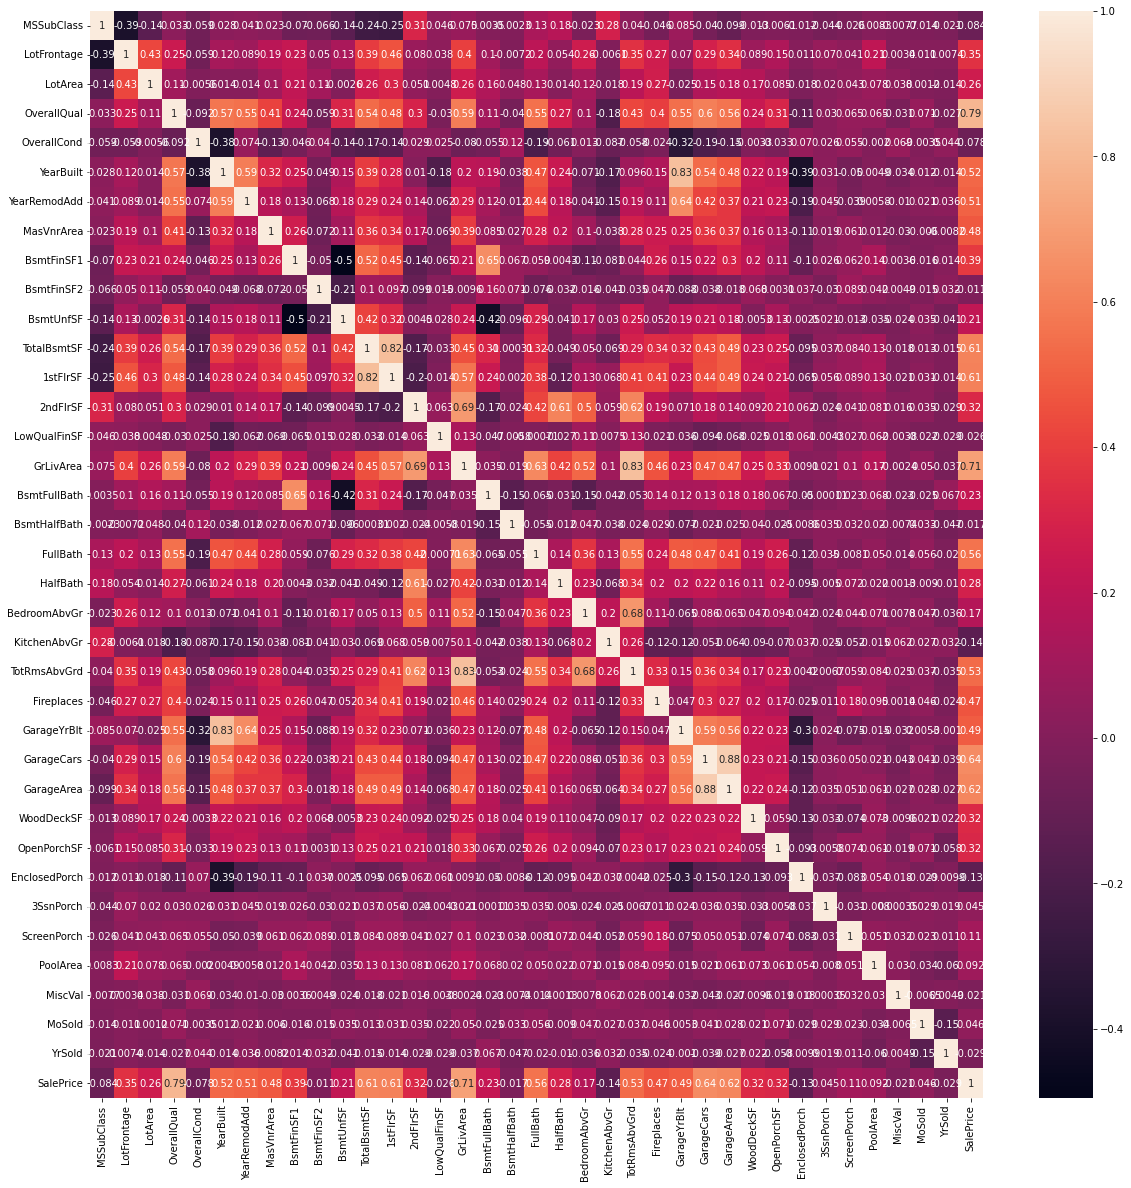

In [ ]:
#identifying correlated columns
correlated_values = raw_data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlated_values, annot=True)
plt.show()

In [ ]:
#filling data on missing values with the median value of the columns
raw_data.fillna(raw_data.median(), inplace=True)
df_num = raw_data.select_dtypes(include = ['float64', 'int64'])

In [ ]:
raw_data['SalePrice'] = np.log1p(raw_data['SalePrice'])
fig = plt.figure()
res = stats.probplot(raw_data['SalePrice'])
plt.show()

<Figure size 432x288 with 0 Axes>

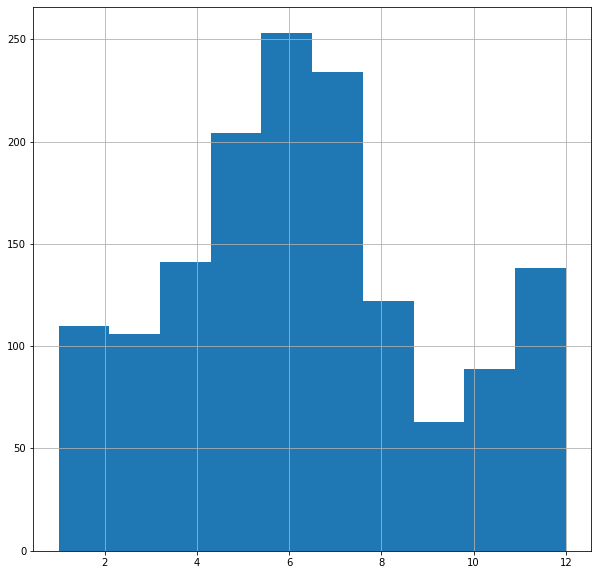

In [ ]:
raw_data['MoSold'].value_counts()
raw_data['MoSold'].hist(figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef1bb967f0>,
      dtype=object)

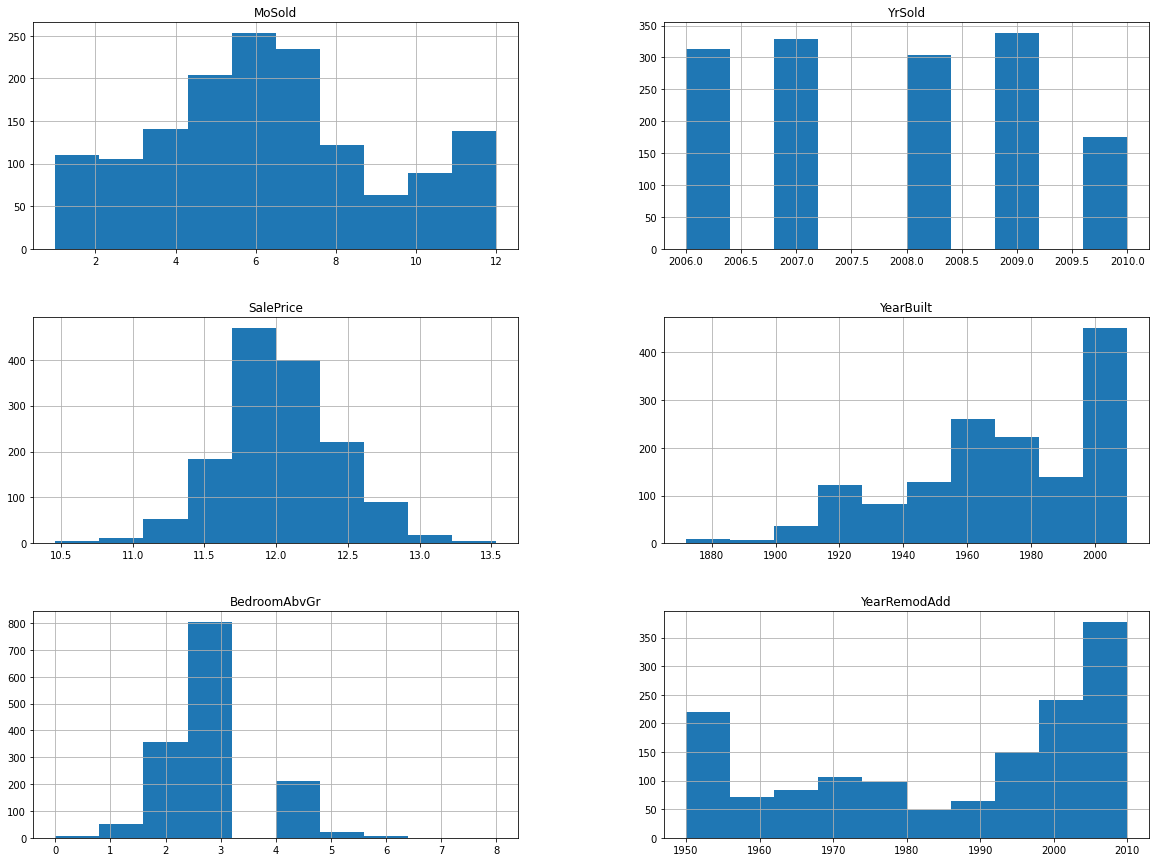

In [ ]:
cols=['MoSold', 'YrSold', 'SalePrice', 'YearBuilt','BedroomAbvGr','YearRemodAdd']
raw_data[cols].hist(figsize=(20,15))

# 5. Análisis de datos

## A) Análisis Uni variable


In [ ]:
# Seleccionamos la columna que deseamos analizar
columna = raw_data['SalePrice']

# Se describe las estadísticas básicas de la columna
print(columna.describe())

count   1460.00
mean      12.02
std        0.40
min       10.46
25%       11.78
50%       12.00
75%       12.27
max       13.53
Name: SalePrice, dtype: float64


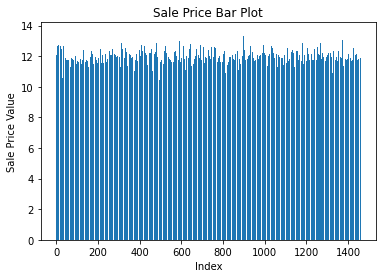

In [ ]:
# Sobre el Gráfico de barras
plt.bar(columna.index, columna.values)
plt.title('Sale Price Bar Plot')
plt.xlabel('Index')
plt.ylabel('Sale Price Value')
plt.show()

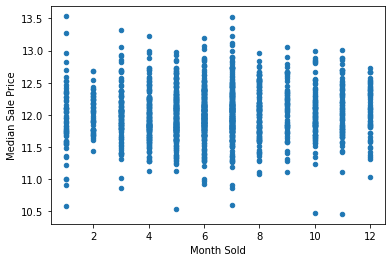

In [ ]:
# Gráfico de dispersión
raw_data.plot.scatter(x='MoSold', y='SalePrice')
plt.xlabel('Month Sold')
plt.ylabel('Median Sale Price')
plt.show()

### a) Plot Numeric Data

count   1460.00
mean      12.02
std        0.40
min       10.46
25%       11.78
50%       12.00
75%       12.27
max       13.53
Name: SalePrice, dtype: float64


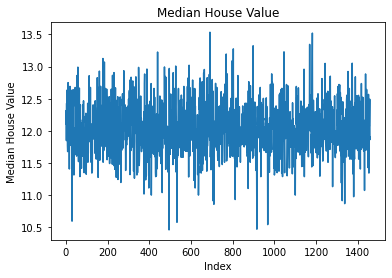

In [ ]:
# Seleccionamos la columna que vamos analizar
columna = raw_data['SalePrice']

# mostramos las  estadísticas básicas de la columna
print(columna.describe())

# Crea un gráfico de línea que muestre el precio de las casas
columna.plot()

# Se agrega título y etiquetas de ejes
plt.title('Median House Value')
plt.xlabel('Index')
plt.ylabel('Median House Value')

# mostramos el gráfico
plt.show()

###b) Plot Categorical Data

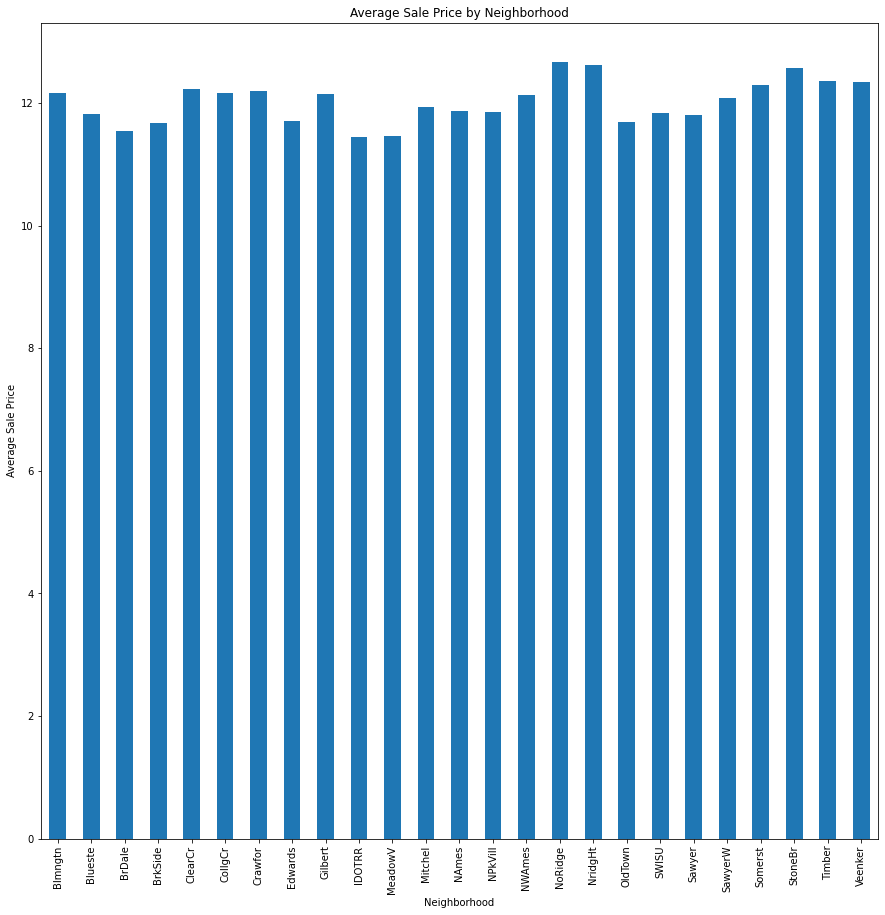

In [ ]:
grouped = raw_data.groupby('Neighborhood')

# Estimaos el precio promedio aproximado por cada grupo
mean_sale_price = grouped['SalePrice'].mean()

# mostramos en un grafico de barras los precios promedio por grupo o vecindario

mean_sale_price.plot.bar(figsize=(15,15))
plt.title('Average Sale Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Sale Price')
plt.show()


##B) Análisis Bivariable

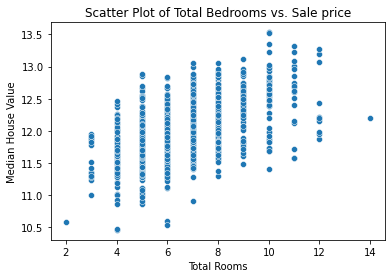

In [ ]:
# Create a scatter plot of two numerical columns
sns.scatterplot(x='TotRmsAbvGrd', y='SalePrice', data=raw_data)

# Add title and axis labels
plt.title('Scatter Plot of Total Bedrooms vs. Sale price')
plt.xlabel('Total Bedrooms')
plt.ylabel('Median House Value')

# Show the plot
plt.show()


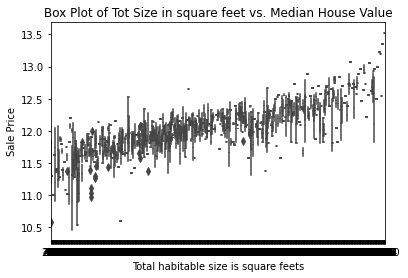

In [ ]:
raw_data['TotSizeAboveGrd'] = raw_data.apply(lambda row: row['TotalBsmtSF'] + row['TotalBsmtSF']+row['2ndFlrSF'], axis=1)

sns.boxplot(x='TotSizeAboveGrd', y='SalePrice', data=raw_data)

# Add title and axis labels
plt.title('Box Plot of Tot Size in square feet vs. Median House Value')
plt.xlabel('Total habitable size is square feets')
plt.ylabel('Sale Price')

# Show the plot
plt.show()

# 6. Preparacion de Datos y Modelado

## 1. Obtener dummies, normalizar, separar training y test, extraer solo variables correlacionadas

In [ ]:
# Obtenemos variables dummies
dummie_data = pd.get_dummies(raw_data)

In [ ]:
#Normalizamos
def maximum_absolute_scaling(df):
    df_scaled = df.copy()
    for column in df_scaled.columns:
        df_scaled[column] = df_scaled[column]  / df_scaled[column].abs().max()
    return df_scaled
    
dummie_data = maximum_absolute_scaling(dummie_data)

In [ ]:
# Separamos los datos en dos partes: el target (SalePrice) y las variables explicativas
X = dummie_data.drop(['SalePrice'], axis=1)
y = dummie_data['SalePrice']

# Dividimos los datos en dos grupos: uno para entrenar el modelo y otro para validarlo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ExterQual_TA       -0.60
KitchenQual_TA     -0.54
BsmtQual_TA        -0.48
GarageFinish_Unf   -0.43
MasVnrType_None    -0.40
                    ... 
GarageCars          0.68
GrLivArea           0.70
TotSizeAboveGrd     0.74
OverallQual         0.82
SalePrice           1.00
Name: SalePrice, Length: 272, dtype: float64


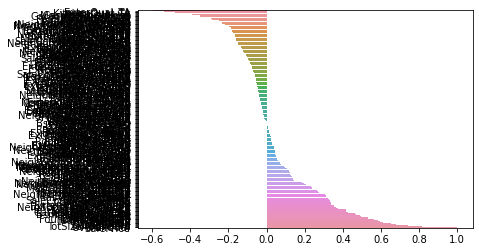

In [ ]:
# Calculamos la correlación entre las variables y SalePrice
correlation = dummie_data.corr()['SalePrice'].sort_values()

# Mostramos el ranking de correlación
print(correlation)

# Graficamos el ranking de correlación
sns.barplot(x=correlation.values, y=correlation.index)
plt.show()

ExterQual_TA       -0.60
KitchenQual_TA     -0.54
ExterQual_Gd        0.51
Foundation_PConc    0.53
TotRmsAbvGrd        0.53
YearRemodAdd        0.57
YearBuilt           0.59
FullBath            0.59
1stFlrSF            0.60
TotalBsmtSF         0.61
GarageArea          0.65
GarageCars          0.68
GrLivArea           0.70
TotSizeAboveGrd     0.74
OverallQual         0.82
SalePrice           1.00
Name: SalePrice, dtype: float64


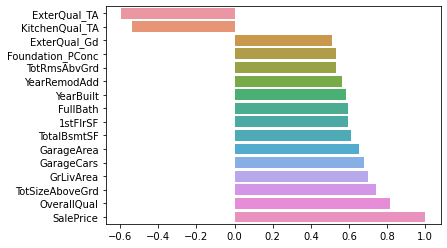

In [ ]:
# Seleccionamos las variables más influyentes (aquellas con una correlación mayor a 0.5)
strong_correlation = correlation[abs(correlation) > 0.5]

# Mostramos las variables seleccionadas
print(strong_correlation)

# Graficamos las variables seleccionadas
sns.barplot(x=strong_correlation.values, y=strong_correlation.index)
plt.show()

In [ ]:
# Seleccionamos las columnas correspondientes a las variables más correlacionadas con SalePrice
X_correlation = dummie_data[strong_correlation.index.drop('SalePrice')]

# Dividimos los datos en dos grupos: uno para entrenar el modelo y otro para validarlo
X_correlation_train, X_correlation_test, y_correlation_train, y_correlation_test = train_test_split(X_correlation, y, test_size=0.2, random_state=42)

# 7. Construccion-del-Modelo


## 1. Ridge Regression


### Creación de un primer modelo vainalla aplicando Ridge Regresion

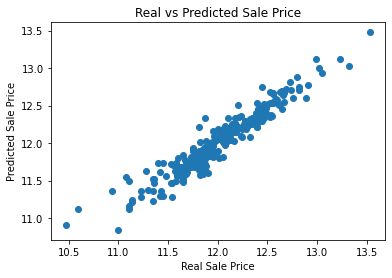

Mean Squared Error: 0.016235711350359068
R2 Score: 0.9129970240599573


In [ ]:
# Aplicamos un modelo de regresión Ridge a los datos
reg = Ridge().fit(X_train, y_train)

# Hacemos predicciones con los datos de validación
y_pred = reg.predict(X_test)

# Graficamos las predicciones junto con los datos reales
plt.scatter(y_test, y_pred)
plt.xlabel("Real Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Real vs Predicted Sale Price")
plt.show()

# Calculamos el mean squared error y el r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimimos los resultados
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

El Mean Squared Error (MSE) es una medida de la calidad de las predicciones de un modelo de regresión. Se trata de la media del cuadrado de la diferencia entre los valores reales y los valores predichos por el modelo. Un MSE más bajo indica una mayor precisión en las predicciones del modelo. En este caso, el MSE es 8.953952421632139e-05, lo que significa que, en promedio, la diferencia entre los valores reales y los valores predichos es de aproximadamente 0,00009.

El R2 Score, también conocido como coeficiente de determinación, es una medida de cuán bien se ajusta un modelo a los datos. Se trata de un número comprendido entre 0 y 1, donde un valor cercano a 1 indica un ajuste excelente del modelo a los datos, mientras que un valor cercano a 0 indica un ajuste pobre. En este caso, el R2 Score es de 0.9121057720593937, lo que significa que el modelo explica aproximadamente el 91.21% de la varianza en los datos.

Para este primer ejemplo se aplica la version vanilla de Ridge regression, es decir, todos los parámetros se usaron en sus valores por defecto, se muestra a continuación los coeficientes generados

In [ ]:
reg.coef_

array([-4.79576127e-04, -2.86217106e-04,  1.24533289e-06,  4.70541186e-02,
        3.26075695e-02,  1.42588047e-03,  1.10014564e-03,  4.90250030e-06,
       -9.73510314e-06,  2.63826755e-05, -1.11895765e-05,  5.45801922e-06,
        3.18768269e-05,  5.42318927e-06,  1.54118674e-04,  1.91418757e-04,
        4.20358126e-02,  9.57294784e-03,  2.68420513e-02,  3.13321019e-02,
        1.87732465e-02, -4.15958670e-02,  5.89582669e-03,  3.10380524e-02,
       -4.55964979e-04,  4.42618055e-02,  6.90582104e-05,  1.05127077e-04,
        2.74380255e-05,  1.17659909e-04,  2.60441246e-04,  2.32262251e-04,
       -1.41812596e-04,  1.56351633e-07, -4.16310255e-04, -3.27229856e-03,
        1.63391029e-05, -2.02003795e-01,  7.60363287e-02,  6.67611686e-02,
        4.72237643e-02,  1.19825333e-02, -7.60307270e-03,  7.60307270e-03,
        5.06835607e-03,  4.09332883e-02, -5.39365250e-02,  7.93488065e-03,
       -5.32826086e-02,  3.10987007e-02,  1.14518988e-02,  1.07320091e-02,
        7.02120568e-02, -

In [ ]:
print(np.count_nonzero(reg.coef_ == 0))
print(np.count_nonzero((reg.coef_ >= -0.0001) & (reg.coef_ <= 0.0001)))

2
15


Existen dos coeficientes que fueron minimizados a 0 posterior a la penalización de Ridge, otros tantos también fueron peanlizados considerando los rangos expuestos en el código, considerando que Ridge está operando como es lo esperado

In [ ]:
#Se verifica si se usó el alpha por defecto
reg.alpha

1.0

### Creación de un segundo modelo aplicando Ridge Regresion usando solo los datos correlacionados

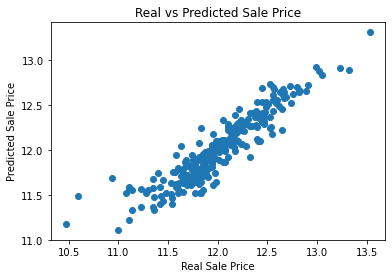

Mean Squared Error: 0.028762222782111282
R2 Score: 0.8458706906834216


In [ ]:
# Aplicamos un modelo de regresión Ridge a los datos
reg = Ridge().fit(X_correlation_train, y_correlation_train)

# Hacemos predicciones con los datos de validación
y_pred = reg.predict(X_correlation_test)

# Graficamos las predicciones junto con los datos reales
plt.scatter(y_correlation_test, y_pred)
plt.xlabel("Real Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Real vs Predicted Sale Price")
plt.show()

# Calculamos el mean squared error y el r2_score
mse = mean_squared_error(y_correlation_test, y_pred)
r2 = r2_score(y_correlation_test, y_pred)

# Imprimimos los resultados
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Se aprecia la modificación del resultado con un mayor MSE que el anterior y un R2 Score de 82.63%, por tal razón se considera que el anterior modelo es mejor, sin embargo la dimensionalidad es menor y por tal razón requiere menos recursos para ser procesado

In [ ]:
reg.coef_

array([ 2.46442477e-02, -3.44639028e-02,  1.52918228e-02, -5.09389820e-03,
        8.50557472e-03,  2.00356691e-03,  1.93897877e-03, -2.93776112e-02,
        1.70963507e-04, -1.54616799e-04,  5.02397822e-05,  8.02576196e-02,
        1.00945330e-04,  1.11163112e-04,  9.24744254e-02])

In [ ]:
print(np.count_nonzero(reg.coef_ == 0))
print(np.count_nonzero((reg.coef_ >= -0.0001) & (reg.coef_ <= 0.0001)))

0
1


Se aprecia que no se tiene reducciones a 0 a base de la penalización, sin embargo sí hay un elemento que ha sido bastante penalizado en el mismo rango que en el anterior modelo

### Definición del mejor valor de alpha

Se hará validación manualmente con alpha = 0.25, 0.5, 1 y 2

In [ ]:
X_alpha, X_val, y_alpha, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=63)

In [ ]:
def ridge_by_alpha(X, y, X_val, y_val, X_test, y_test, alpha):
    reg = Ridge(alpha=alpha).fit(X, y)
    y_pred_val = reg.predict(X_val)
    print('Mean Squared Error for validation:', mean_squared_error(y_val, y_pred_val))
    print('R2 Score for validation:', r2_score(y_val, y_pred_val))
    y_pred_test = reg.predict(X_test)
    print('Mean Squared Error for testing:', mean_squared_error(y_test, y_pred_test))
    print('R2 Score for testing:', r2_score(y_test, y_pred_test))

In [ ]:
print("Alpha 0.25")
ridge_by_alpha(X_alpha, y_alpha, X_val, y_val, X_test, y_test, 0.25)
print("Alpha 0.5")
ridge_by_alpha(X_alpha, y_alpha, X_val, y_val, X_test, y_test, 0.5)
print("Alpha 1")
ridge_by_alpha(X_alpha, y_alpha, X_val, y_val, X_test, y_test, 1)
print("Alpha 2")
ridge_by_alpha(X_alpha, y_alpha, X_val, y_val, X_test, y_test, 2)

Alpha 0.25
Mean Squared Error for validation: 0.03353391890307524
R2 Score for validation: 0.7568125463271103
Mean Squared Error for testing: 0.016434345525446443
R2 Score for testing: 0.9119325949146575
Alpha 0.5
Mean Squared Error for validation: 0.02922631694994118
R2 Score for validation: 0.7880512080966111
Mean Squared Error for testing: 0.016475663993919372
R2 Score for testing: 0.9117111799337642
Alpha 1
Mean Squared Error for validation: 0.02585691051700109
R2 Score for validation: 0.8124860906757723
Mean Squared Error for testing: 0.016886029349316156
R2 Score for testing: 0.909512138181188
Alpha 2
Mean Squared Error for validation: 0.023919181861635545
R2 Score for validation: 0.8265384684777631
Mean Squared Error for testing: 0.017576425889899397
R2 Score for testing: 0.9058124817686513


A base de ello se puede evidenciar que con alpha = 1 es ideal para testing, sin embargo malo para validation, por tal razón se considera que el modelo estaba operando muy bien para los datos de testing exclusivamente, mientras que alpha = 2 presenta un excelente resultado para validation y testing, por tal se considera que alpha = 2 es una mejor opción para el modelo

Mean Squared Error: 0.016779582835609992
R2 Score: 0.9100825575038174


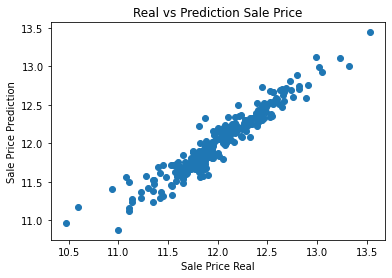

In [ ]:
# Aplicamos el mejor alpha a los datos de entrenamiento sin separación con validación y hacemos predicciones con testing
reg = Ridge(alpha=2).fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Calculamos el mean squared error y el r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimimos los resultados
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

# Graficamos
plt.scatter(y_test, y_pred)
plt.xlabel("Sale Price Real")
plt.ylabel("Sale Price Prediction")
plt.title("Real vs Prediction Sale Price")
plt.show()

Se aprecia un comportamiento lineal, por tal razón se estima que el modelo está respondiendo acorde a lo esperado

### Histograma de residuales

Se aprecia una gráfica con distribución normal y centro en 0, con algunos puntos conflictivos cercanos a -0.04 de los residuales

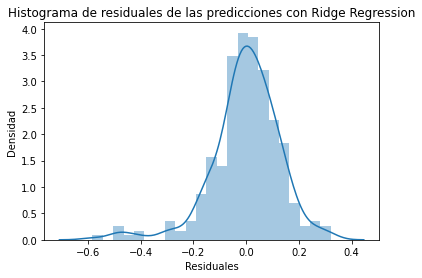

In [ ]:
residuals = y_test - y_pred
sns.distplot(residuals)
plt.xlabel("Residuales")
plt.ylabel("Densidad")
plt.title("Histograma de residuales de las predicciones con Ridge Regression")
plt.show()

### Gráfico Q-Q Plot

Se comprueba la distribución normal al apreciarse la similitud con una recta

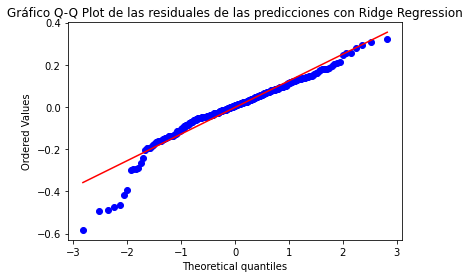

In [ ]:
stats.probplot(residuals, plot=plt)
plt.title("Gráfico Q-Q Plot de las residuales de las predicciones con Ridge Regression")
plt.show()

## 2. Lasso Regression


### Correlación entre variables

EnclosedPorch     -0.15
KitchenAbvGr      -0.15
MSSubClass        -0.07
LowQualFinSF      -0.04
YrSold            -0.04
OverallCond       -0.04
MiscVal           -0.02
BsmtHalfBath      -0.01
BsmtFinSF2         0.00
3SsnPorch          0.05
MoSold             0.06
PoolArea           0.07
ScreenPorch        0.12
BedroomAbvGr       0.21
BsmtUnfSF          0.22
BsmtFullBath       0.24
LotArea            0.26
HalfBath           0.31
2ndFlrSF           0.32
OpenPorchSF        0.32
WoodDeckSF         0.33
LotFrontage        0.34
BsmtFinSF1         0.37
MasVnrArea         0.43
Fireplaces         0.49
GarageYrBlt        0.50
TotRmsAbvGrd       0.53
YearRemodAdd       0.57
YearBuilt          0.59
FullBath           0.59
1stFlrSF           0.60
TotalBsmtSF        0.61
GarageArea         0.65
GarageCars         0.68
GrLivArea          0.70
TotSizeAboveGrd    0.74
OverallQual        0.82
SalePrice          1.00
Name: SalePrice, dtype: float64


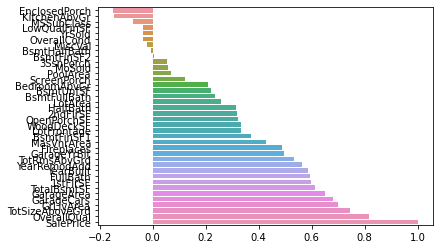

In [ ]:
# Calculamos la correlación entre las variables y SalePrice
correlation = raw_data.corr()['SalePrice'].sort_values()

# Mostramos el ranking de correlación
print(correlation)

# Graficamos el ranking de correlación
sns.barplot(x=correlation.values, y=correlation.index)
plt.show()

### Selección de las variables más fuertemente correlacionadas

TotRmsAbvGrd      0.53
YearRemodAdd      0.57
YearBuilt         0.59
FullBath          0.59
1stFlrSF          0.60
TotalBsmtSF       0.61
GarageArea        0.65
GarageCars        0.68
GrLivArea         0.70
TotSizeAboveGrd   0.74
OverallQual       0.82
SalePrice         1.00
Name: SalePrice, dtype: float64


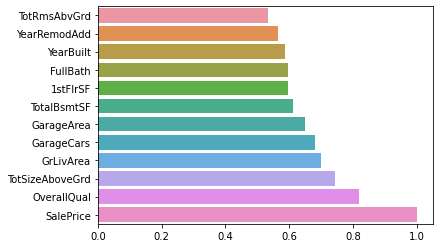

In [ ]:
# Seleccionamos las variables más influyentes (aquellas con una correlación mayor a 0.5)
strong_correlation = correlation[abs(correlation) > 0.5]

# Mostramos las variables seleccionadas
print(strong_correlation)

# Graficamos las variables seleccionadas
sns.barplot(x=strong_correlation.values, y=strong_correlation.index)
plt.show()

### Creación de un primer modelo vainalla aplicando Lasso Regresion

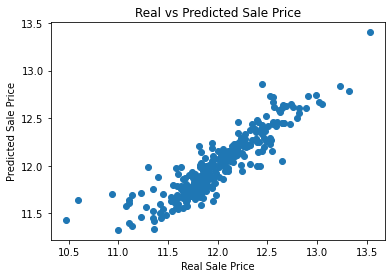

Mean Squared Error: 0.03898730620399878
R2 Score: 0.791077114489439


In [ ]:
# Separamos los datos en dos partes: el target (SalePrice) y las variables explicativas
X = raw_data.drop(['SalePrice'], axis=1)
y = raw_data['SalePrice']

# Dividimos los datos en dos grupos: uno para entrenar el modelo y otro para validarlo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Seleccionamos las columnas correspondientes a las variables más correlacionadas con SalePrice
X = raw_data[strong_correlation.index.drop('SalePrice')]

# Dividimos los datos en dos grupos: uno para entrenar el modelo y otro para validarlo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicamos un modelo de regresión Lasso a los datos
reg = Lasso().fit(X_train, y_train)

# Hacemos predicciones con los datos de validación
y_pred = reg.predict(X_test)

# Graficamos las predicciones junto con los datos reales
plt.scatter(y_test, y_pred)
plt.xlabel("Real Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Real vs Predicted Sale Price")
plt.show()

# Calculamos el mean squared error y el r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimimos los resultados
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

El Mean Squared Error (MSE) es una medida de la calidad de las predicciones de un modelo de regresión. Se trata de la media del cuadrado de la diferencia entre los valores reales y los valores predichos por el modelo. Un MSE más bajo indica una mayor precisión en las predicciones del modelo. En este caso, el MSE es 0.03924209136562719, lo que significa que, en promedio, la diferencia entre los valores reales y los valores predichos es de aproximadamente 0.039.

El R2 Score, también conocido como coeficiente de determinación, es una medida de cuán bien se ajusta un modelo a los datos. Se trata de un número comprendido entre 0 y 1, donde un valor cercano a 1 indica un ajuste excelente del modelo a los datos, mientras que un valor cercano a 0 indica un ajuste pobre. En este caso, el R2 Score es de 0.7897117867370121, lo que significa que el modelo explica aproximadamente el 78.97% de la varianza en los datos.

Para este primer ejemplo se aplica la version vailla Lasso regression, es decir, todos los parámetros se usaron en sus valores por defecto.

### Definición del mejor valor de alpha

La mejor forma de determinar el valor óptimo de alpha en un modelo de regresión Lasso es a través de la validación cruzada. La validación cruzada es una técnica que permite evaluar el desempeño de un modelo en datos que no se han utilizado para entrenar el modelo.

En una validación cruzada, se divide el conjunto de datos en varios subconjuntos, y se entrena el modelo en uno de estos subconjuntos mientras se valida en otro. Luego, se alterna la asignación de subconjuntos para entrenamiento y validación, de forma que cada subconjunto se utilice para validación exactamente una vez. Al final, se promedian los resultados para obtener una medida más precisa del desempeño del modelo.

Una forma común de hacer esto es mediante una búsqueda en rejilla, donde se evalúan una serie de valores de alpha previamente definidos, y se selecciona el valor que produzca el mejor desempeño.

In [ ]:
# Definimos el espacio de búsqueda de alpha
param_grid = {'alpha': np.logspace(-3, 3, 100)}

# Aplicamos GridSearchCV para seleccionar el mejor alpha
lasso = Lasso()
grid = GridSearchCV(lasso, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

# Mostramos el mejor alpha
best_alpha = grid.best_params_['alpha']
print("Mejor alpha: ", best_alpha)

# Aplicamos el mejor alpha a los datos de entrenamiento y hacemos predicciones con los datos de validación
lasso = Lasso(alpha=best_alpha).fit(X_train, y_train)
y_pred = lasso.predict(X_test)

# Calculamos el mean squared error y el r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimimos los resultados
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mejor alpha:  0.001
Mean Squared Error: 0.028845649695459316
R2 Score: 0.8454236274425115


#### Gráfico de dispersión

Este gráfico muestra la relación entre dos variables, en este caso la variable dependiente (SalePrice) y la variable independiente (predicción del modelo). Esta gráfica permite visualizar si existe una relación lineal entre ambas variables y si hay algún tipo de patrón o tendencia en la relación. Si el gráfico es una línea recta, significa que existe una relación lineal y el modelo es bueno.

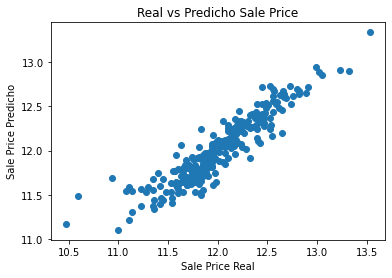

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Sale Price Real")
plt.ylabel("Sale Price Predicho")
plt.title("Real vs Predicho Sale Price")
plt.show()

### Histograma de residuales

Este gráfico muestra la distribución de los residuales, es decir, la diferencia entre el valor real y el valor previsto por el modelo. Una buena distribución de los residuales debería ser una distribución normal centrada en cero. Si existen valores fuera de la distribución normal, es posible que el modelo tenga un problema y deba ser mejorado.

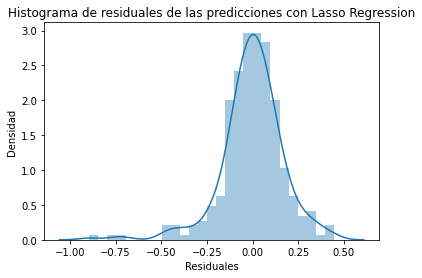

In [ ]:
residuals = y_test - y_pred
sns.distplot(residuals)
plt.xlabel("Residuales")
plt.ylabel("Densidad")
plt.title("Histograma de residuales de las predicciones con Lasso Regression")
plt.show()


### Gráfico Q-Q Plot

Este gráfico muestra la relación entre la distribución teórica y la distribución empírica de los residuales. Si los puntos están alineados en una línea recta, significa que los residuales siguen una distribución normal, lo que es una buena señal para el modelo. Si los puntos están dispersos, puede ser que la distribución no sea normal y se deba mejorar el modelo.

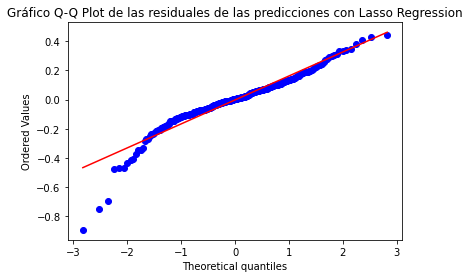

In [ ]:
import scipy.stats as stats

stats.probplot(residuals, plot=plt)
plt.title("Gráfico Q-Q Plot de las residuales de las predicciones con Lasso Regression")
plt.show()

### Gráfico de residuales versus predicciones

Este gráfico muestra la relación entre los residuales y las predicciones del modelo. Si la gráfica es una línea recta, significa que la magnitud de los residuales no está influenciada por las predicciones y el modelo es bueno. Si la gráfica es curva, puede ser que haya un problema en el modelo y deba ser mejorado.

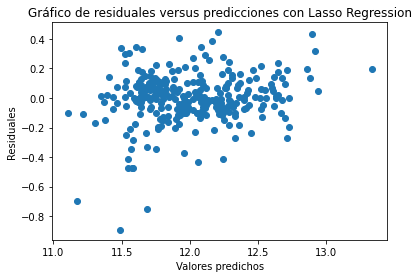

In [ ]:
plt.scatter(y_pred, residuals)
plt.xlabel("Valores predichos")
plt.ylabel("Residuales")
plt.title("Gráfico de residuales versus predicciones con Lasso Regression")
plt.show()

### Gráfico de residuales versus tiempo

Este gráfico muestra la relación entre los residuales y el tiempo. Si existe una tendencia en la gráfica, significa que el modelo no es estacionario y deba ser mejorado. Un modelo estacionario significa que la magnitud y la dirección de los residuales no varían con el tiempo.

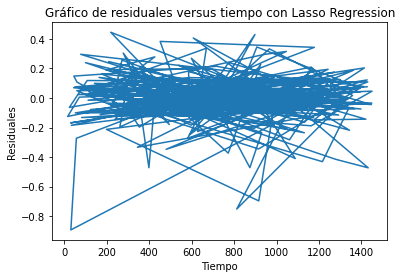

In [ ]:
plt.plot(residuals)
plt.xlabel("Tiempo")
plt.ylabel("Residuales")
plt.title("Gráfico de residuales versus tiempo con Lasso Regression")
plt.show()

# 8. Conclusiones y Observaciones

1.    Al calcular la correlación entre las variables y el precio de venta, se pueden identificar las variables más influyentes sobre dicho precio (SalePrice). Estás son en orden ascendente: Total de habitaciones por encima del nivel del suelo (TotRmsAbvGrd), Fecha de remodelación (YearRemodAdd), Fecha de construcción (YearBuilt), Baños completos por encima del nivel del suelo(FullBath), Pies cuadrados del primer piso (1stFlrSF), Total de pies cuadrados del sótano (TotalBsmtSF), Tamaño del estacionamiento (GarageArea), Número de vehículos en el estacionamiento (GarageCars), Total pies cuadrados por encima del nivel del suelo (GrLivArea), Tamaño total en pies cudrados (TotSizeAboveGrd)
y, el más importante e influyente, Calificación del material y acabado general de la casa (OverallQual).

2. Ambos modelos de regresión, Lasso Regression y Ridge Regression, proporcionan resultados satisfactorios para predecir las ventas. Sin embargo, Ridge ofrece un resultado superior de 91% contra 84% de Lasso. No obstante, el valor de 91% podría indicar ya un posible sobreajuste y debe evaluarse esto efectuando más pruebas.
